# Predicting the sale price of bulldozers using machine learning

## Problem Definition
> Predict the future sale price of a buldozers given the charecteristics and previous examples of sales. minimize the error
## Data
> Data downloaded from kaggle Bluebook for Buldozers competition

In [38]:
# Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# importing training and validation set data.
df = pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False)

In [40]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [41]:
# Checking missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

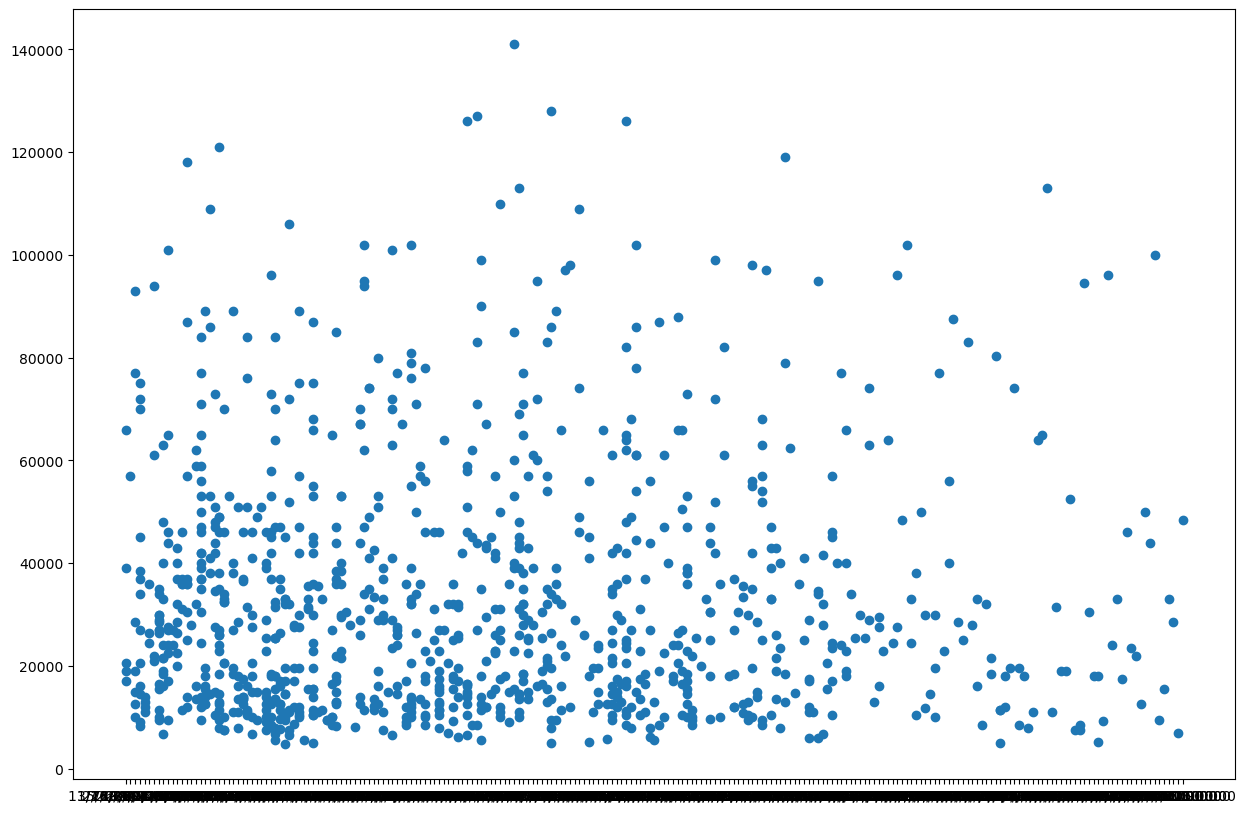

In [42]:
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

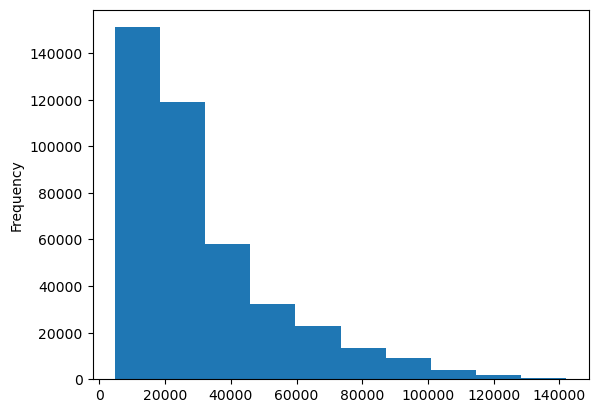

In [43]:
# Price distribution
df.SalePrice.plot.hist();

### Parsing dates
here we have time series data, we can tell Pandas which column has dates in it using the **parse_dates** parameter this will convert to Datetime format

In [44]:
# Re importing with date time
df = pd.read_csv("Data/bluebook-for-bulldozers/TrainAndValid.csv",
                low_memory=False,parse_dates=["saledate"])

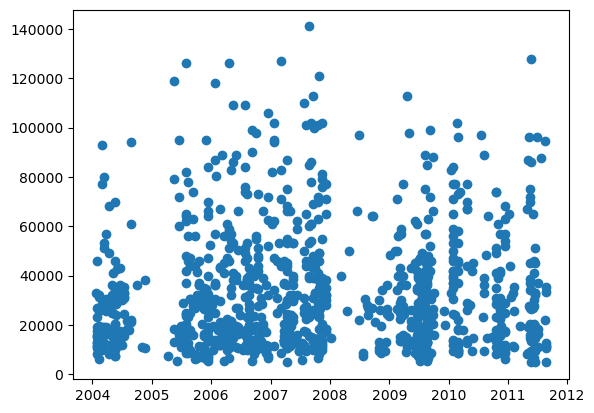

In [45]:
# Plotting with dates the difference would be the x axis compared to previous plot
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

In [46]:
# All the dates are not in order and needs sorting
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### sort data frame by sale date
using  .sort_values(by=["column name"], ascending=True)

In [47]:
# sorting the df using sale date
df.sort_values(by=["saledate"], ascending=True, inplace=True)
df.saledate.head()

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [48]:
# Making a copy of original data frame 
df_copy = df.copy()

### Importance of DataTime 
by adding datetime parameters to saledate column  we can get access to various atributes of date time, such as day, month, year,week etc

We can access these attributes using **.dt.attribute**

In [49]:
# Adding a new features : saleyear salemonth sale day saledayofweek sale day of year
df_copy["saleYear"] = df_copy.saledate.dt.year
df_copy["saleMonth"] = df_copy.saledate.dt.month
df_copy["saleDay"] = df_copy.saledate.dt.day
df_copy["saleDayOfWeek"] = df_copy.saledate.dt.dayofweek
df_copy["saleDayOfYear"] = df_copy.saledate.dt.dayofyear

In [50]:
# Now that we have extracted the date info we can remove the saledate feature
df_copy.drop(["saledate"],axis=1, inplace=True)

In [51]:
# Check values of different columns
df_copy.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## Modelling
Before modelling we need to perform following tasks on the data:
* Handling Missing Values
* Converting all data into numeric format

In [52]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [53]:
df_copy.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

### Convert Strings to Categories
**pd.api.types.function** as a bunch of functionalities that can be used for this task

In [54]:
# Finding the columns which contain strings
unique_types = set(type(x) for x in df_copy["UsageBand"])
print(unique_types)
# If a column contains mixed data types the column may not be expressed as string type
# while quering it with pd.api.types.is_string_dtype()

# one way is to convert the entire column as string

obj_columns = ["UsageBand","fiModelDesc","fiBaseModel","fiSecondaryDesc","fiModelSeries","fiModelDescriptor","ProductSize",
               "fiProductClassDesc","state","ProductGroup","ProductGroupDesc","Drive_System","Enclosure","Forks","Pad_Type",
               "Ride_Control","Stick","Transmission","Turbocharged","Blade_Extension","Blade_Width","Enclosure_Type","Engine_Horsepower",
               "Hydraulics","Pushblock","Ripper","Scarifier","Tip_Control","Tire_Size","Coupler","Coupler_System", "Grouser_Tracks",
               "Hydraulics_Flow","Track_Type","Undercarriage_Pad_Width","Stick_Length","Thumb","Pattern_Changer","Grouser_Type","Backhoe_Mounting",
               "Blade_Type","Travel_Controls","Differential_Type","Steering_Controls" ]
for i in range(len(obj_columns)):
    df_copy[obj_columns[i]] = df_copy[obj_columns[i]].astype("str")


{<class 'str'>, <class 'float'>}


.as_ordered():

This method converts the categorical data into an ordered categorical data type. Ordered categorical data means that the categories have a meaningful order, like low, medium, high or small, medium, large.

In [55]:
# Converting string value into category
for label, content in df_copy.items():
    if pd.api.types.is_string_dtype(content):
        df_copy[label] = content.astype("category").cat.as_ordered()

In [56]:
# check if string has changed to category
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 412698 non-null  category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           412698 non-null  category
 12  fiModelSeries             412698 non-null  category
 13  fiModelDescriptor         412

In [57]:
# Viewing categories
df_copy.state.cat.categories
# under the hood pandas is treating each category as a number

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [58]:
# Checking the numbers assigned
df_copy.state.cat.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

### Saving preprocessed data
Till here we have converted all data into numeric format but we still have missing values in the data to be dealt with further

In [59]:
df_copy.to_csv("Data/bluebook-for-bulldozers/train_copy_all_numeric.csv",
              index=False)

In [60]:
# Loading this saved data in a new data Frame
data_df = pd.read_csv("Data/bluebook-for-bulldozers/train_copy_all_numeric.csv",
                     low_memory = False)

In [61]:
data_df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,TD20,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,A66,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,D7G,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,A62,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,D3B,...,None or Unspecified,PAT,Lever,NaN,NaN,1989,1,31,1,31
5,1301884,23500.0,1182999,4123,132,99.0,1976,NaN,NaN,D6C,...,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,31,1,31
6,1379228,31000.0,1082797,7620,132,99.0,1986,NaN,NaN,IT12,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
7,1645390,11750.0,1527216,8202,132,99.0,1970,NaN,NaN,544,...,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
8,1493279,63000.0,1363756,2759,132,99.0,1987,NaN,NaN,D5HII,...,None or Unspecified,PAT,None or Unspecified,NaN,NaN,1989,1,31,1,31
9,1449549,13000.0,1289412,3356,132,99.0,1966,NaN,NaN,12F,...,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31


## Filling Missing Values

Filling numeric values first

In [63]:
# Which columns are actually numeric?
for label, content in data_df.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [64]:
# Check which numeric columns has numeric values
for label, content in data_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [65]:
# Filling numeric rows with the median 
for label,content in data_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column telling data was missing originally
            data_df[label + "is_missing"] = pd.isnull(content)
            # filling missing numeric values with median
            data_df[label] = content.fillna(content.median())

In [66]:
# Check if there is still any null numeric values
for label, content in data_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
        else :
            print(f"No Null Values in {label}")

No Null Values in SalesID
No Null Values in SalePrice
No Null Values in MachineID
No Null Values in ModelID
No Null Values in datasource
No Null Values in auctioneerID
No Null Values in YearMade
No Null Values in MachineHoursCurrentMeter
No Null Values in saleYear
No Null Values in saleMonth
No Null Values in saleDay
No Null Values in saleDayOfWeek
No Null Values in saleDayOfYear
No Null Values in auctioneerIDis_missing
No Null Values in MachineHoursCurrentMeteris_missing


In [67]:
# Checking how many are filled using the column that we created earlier
data_df.auctioneerIDis_missing.value_counts()

# The True number matches with the missing values indicated previously in the info

auctioneerIDis_missing
False    392562
True      20136
Name: count, dtype: int64

### Filling missing categorical values

In [68]:
# ALl non numeric columns
for label, content in data_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)


UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [69]:
# Checking category codes for a column
pd.Categorical(data_df["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], dtype=int8)

In [70]:
# Turning categorical variables into numbers and filling missing values
for label, content in data_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column indicating missing values
        data_df[label + "_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        data_df[label] = pd.Categorical(content).codes +1
        # +1 is added because if there is a missing category it gets assigned -1 by default and we can convert it to 0 
        

In [71]:
 data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [72]:
data_df.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [73]:
# Last missing values check :
data_df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that our data is free of missing values and is numerical. we can start modelling

In [36]:
data_df.head(1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True


In [37]:
!pip install XGBoost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 495.5 kB/s eta 0:04:12
   ---------------------------------------- 0.1/124.9 MB 1.2 MB/s eta 0:01:44
   ---------------------------------------- 0.2/124.9 MB 1.2 MB/s eta 0:01:40
   ---------------------------------------- 0.4/124.9 MB 1.9 MB/s eta 0:01:07
   ---------------------------------------- 0.6/124.9 MB 2.2 MB/s eta 0:00:57
   ---------------------------------------- 0.7/124.9 MB 2.4 MB/s eta 0:00:53
   ---------------------------------------- 0.9/124.9 MB 2.7 MB/s eta 0:00:47
   ---------------------------------------- 1.1/124.9 MB 2.9 MB/s eta 0:00:44
   ---------------------------------------- 1.2/124.9 MB 2.9 MB/s eta 0:00:43
   ---------------------------------------- 1.5/124.9 MB 2.9 MB/s eta 0:00:43
    --------------------------------------- 1.6/124.9 MB 3.1 MB/s eta 0:00:4

In [42]:
np.random.seed(42)
# Importing XG Boost Regression model
from xgboost import XGBRegressor
# Model Instance
xgb = XGBRegressor()


In [43]:
%%time
xgb.fit(data_df.drop("SalePrice",axis=1),data_df["SalePrice"])

CPU times: total: 32.3 s
Wall time: 5.29 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
xgb.score(data_df.drop("SalePrice",axis=1),data_df["SalePrice"])

0.8951789602763731

In [50]:
# try Random forest regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1)


In [51]:
%%time
# Fitting RF
model.fit(data_df.drop("SalePrice",axis=1),data_df["SalePrice"])

CPU times: total: 29min 14s
Wall time: 4min 44s


RandomForestRegressor(n_jobs=-1)

In [52]:
model.score(data_df.drop("SalePrice",axis=1),data_df["SalePrice"])

0.98754237259663

This score is not reliable as we have train and evaluated on the same data.
but it can be clearly seen that XGBoost is a collosal 57 times faster than Random Forest which is an advantage of XGBoost when it comes to modelling large data

## Splitting data into train? validation set


In [49]:
data_df.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [53]:
df_valid = data_df[data_df["saleYear"] == 2012 ]
df_train = data_df[data_df["saleYear"] != 2012]

# Splitting data into X and y
X_train, y_train = df_train.drop("SalePrice",axis=1) , df_train["SalePrice"]
X_valid, y_valid = df_valid.drop("SalePrice",axis=1), df_valid["SalePrice"]

X_train.shape , y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [63]:
# Building an evaluation function
from sklearn.metrics import mean_squared_log_error, mean_absolute_error,r2_score

def rmsle(y_true,y_preds):
    """
    calculates root mean squared log error between predictions and true values
    """
    return np.sqrt(mean_squared_log_error(y_true,y_preds))

# Create function to evaluate model on diffrent metrics
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
             "Validation MAE": mean_absolute_error(y_valid,val_preds),
             "Training RMSLE": rmsle(y_train,train_preds),
             "Validation RMSLE": rmsle(y_valid,val_preds),
             "Training R^2": r2_score(y_train,train_preds),
             "Validation R^2": r2_score(y_valid,val_preds)}
    return scores

## Testing our model on a subset of data to save time and tune Hyperparameters

In [58]:
# passing less data to the model to train using max_samples param
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)


In [61]:
%%time
# this must take less time to train
model.fit(X_train,y_train)

CPU times: total: 55.2 s
Wall time: 8.75 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [65]:
show_scores(model)
# These scores are expected to be worse as it is not trained over the entire data

{'Training MAE': 5561.2988092240585,
 'Validation MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Validation RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Validation R^2': 0.8320374995090507}

## Hyperparameter tuning using RandomizedSearchCV

In [70]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter options
rf_grid = {"n_estimators": np.arange(10,100,10),
          "max_depth" : [None, 3,5,10],
          "min_samples_split": np.arange(2,20,2),
          "min_samples_leaf": np.arange(1,20,2),
          "max_features": [0.5,1,"sqrt","auto"],
          "max_samples": [10000]}

# Instantiate Randomized Search CV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                   random_state=42),
                             param_distributions = rf_grid,
                             cv=5,
                              n_iter=5,
                             verbose=True)

# Fit the model
rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Dell\Buldozer_price_prediction_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\Buldozer_price_prediction_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\Buldozer_price_prediction_project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\Buldozer_price_prediction_project\env\Lib\site-packages\sklearn\base.py", line 666, i

CPU times: total: 54.9 s
Wall time: 25.9 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=5,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [71]:
# Best parameters of model
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 12,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': None}

In [72]:
# Evaluate the trained model
show_scores(rs_model)

{'Training MAE': 8875.983964664327,
 'Validation MAE': 11301.311674404647,
 'Training RMSLE': 0.39194018902464994,
 'Validation RMSLE': 0.4477329571140892,
 'Training R^2': 0.6839272780306374,
 'Validation R^2': 0.6372942535703747}

## Train a model with the best hyperparameterss
Note : These were found using 100 iterations of RandomizedSearchCV

In [75]:
%%time

# most Ideal Hyperparameters
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,
                                   random_state=42)

# Fit the ideal model
ideal_model.fit(X_train,y_train)

CPU times: total: 5min 32s
Wall time: 56.7 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [77]:
# Scores for ideal model trained on all data
# improvement seen on a few metrics
show_scores(ideal_model)

{'Training MAE': 2953.8161137163484,
 'Validation MAE': 5951.247761444453,
 'Training RMSLE': 0.14469006962371858,
 'Validation RMSLE': 0.24524163989538328,
 'Training R^2': 0.9588145522577225,
 'Validation R^2': 0.8818019502450094}

## Making Predictions on test data

In [18]:
df_test = pd.read_csv("Data/bluebook-for-bulldozers/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
df_test.head()
# This data has non numeric as well as missing values as well as it is not
# in the same format as the data that the model was trianed on


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [25]:
# Extracting extra features out of date time

# Arranging in order
df_test.sort_values(by="saledate",ascending=True,inplace=True)

In [26]:
# Adding a new features : saleyear salemonth sale day saledayofweek sale day of year
df_test["saleYear"] = df_test.saledate.dt.year
df_test["saleMonth"] = df_test.saledate.dt.month
df_test["saleDay"] = df_test.saledate.dt.day
df_test["saleDayOfWeek"] = df_test.saledate.dt.dayofweek
df_test["saleDayOfYear"] = df_test.saledate.dt.dayofyear

In [27]:
# Checking string data types
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [28]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12457 entries, 1408 to 9803
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries        

In [29]:
obj_columns = ["UsageBand","fiModelDesc","fiBaseModel","fiSecondaryDesc","fiModelSeries","fiModelDescriptor","ProductSize",
               "fiProductClassDesc","state","ProductGroup","ProductGroupDesc","Drive_System","Enclosure","Forks","Pad_Type",
               "Ride_Control","Stick","Transmission","Turbocharged","Blade_Extension","Blade_Width","Enclosure_Type","Engine_Horsepower",
               "Hydraulics","Pushblock","Ripper","Scarifier","Tip_Control","Tire_Size","Coupler","Coupler_System", "Grouser_Tracks",
               "Hydraulics_Flow","Track_Type","Undercarriage_Pad_Width","Stick_Length","Thumb","Pattern_Changer","Grouser_Type","Backhoe_Mounting",
               "Blade_Type","Travel_Controls","Differential_Type","Steering_Controls" ]
for i in range(len(obj_columns)):
    df_test[obj_columns[i]] = df_test[obj_columns[i]].astype("str")

In [30]:
# Converting string value into category
for label, content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        df_test[label] = content.astype("category").cat.as_ordered()

In [31]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12457 entries, 1408 to 9803
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 12457 non-null  category      
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  category      
 10  fiBaseModel               12457 non-null  category      
 11  fiSecondaryDesc           12457 non-null  category      
 12  fiModelSeries        

In [32]:
def preprocess_data(df):
    """
    Performs transformations on df and returns a transformed data frame
    """
    # Adding a new features : saleyear salemonth sale day saledayofweek sale day of year
    # df["saleYear"] = df.saledate.dt.year
    # df["saleMonth"] = df.saledate.dt.month
    # df["saleDay"] = df.saledate.dt.day
    # df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    # df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate",axis=1,inplace=True)
    # Fill numeric rows with median
    for label,content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
            # Add a binary column telling data was missing originally
                df[label + "is_missing"] = pd.isnull(content)
            # filling missing numeric values with median
                df[label] = content.fillna(content.median())
        #Fill categorical missing data and turn cat to num
            if not pd.api.types.is_numeric_dtype(content):
                df[label+"_is_missing"] = pd.isnull(content)
            # we need +1 to the cat code cause pd encodes miss cat as -1
                df[label] = pd.Categorical(content).codes

    return df
        

In [33]:
process_test_df = preprocess_data(df_test)

In [75]:
process_test_df

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeteris_missing
1408,4317459,2295526,8132,172,1,1998,4359.0,Medium,4475,4475,...,nan,nan,nan,nan,2012,5,1,1,122,False
1727,4390262,2287176,18145,172,1,2004,970.0,Low,EC20BXTV,EC20,...,nan,nan,nan,nan,2012,5,1,1,122,False
1246,4291634,2289760,13575,172,1,2004,8602.0,Medium,950GII,950,...,nan,nan,Standard,Conventional,2012,5,1,1,122,False
1146,4270062,2296994,7019,172,1,2003,0.0,nan,246,246,...,nan,nan,nan,nan,2012,5,1,1,122,False
1551,4354444,2279207,2165,172,1,2003,0.0,nan,SK480LC,SK480,...,nan,nan,nan,nan,2012,5,1,1,122,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12399,6642253,2549722,20090,149,1,2006,3525.0,nan,TB145,TB145,...,nan,nan,nan,nan,2012,11,15,3,320,True
11851,6636548,2556338,28549,149,1,2007,3525.0,nan,PC160LC7KA,PC160,...,nan,nan,nan,nan,2012,11,15,3,320,True
12344,6640350,2556559,5892,149,1,1997,3525.0,nan,L90C,L90,...,nan,nan,Standard,Conventional,2012,11,15,3,320,True
9373,6468176,2522746,13307,121,3,2007,3525.0,nan,CX210B,CX210,...,nan,nan,nan,nan,2012,11,15,3,320,True


Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=103)